## Bank Marketing Project

## Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## Goal

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank_data.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Attribute Information:

# Input variables:

# bank client data:
1: age (numeric)
2: job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular', 'telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [3]:
print("Shape of our dataset is:-")
print("Number of rows are:",df.shape[0])
print("number of column are:",df.shape[1])

Shape of our dataset is:-
Number of rows are: 11162
number of column are: 17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

No null values in the dataset

<AxesSubplot:xlabel='deposit', ylabel='count'>

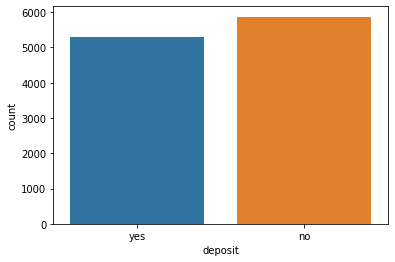

In [7]:
sns.countplot(df['deposit'])

Data Imbalanced. 

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [9]:
df_num = df.select_dtypes(include=[np.number])
df_num.head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [10]:
df_obj = df.select_dtypes(include='object')
df_obj.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes


In [11]:
print("unique values in the dataset are:-")
for i in df_obj.columns:
    print("Unique values in",i,"are",df[i].nunique())   

unique values in the dataset are:-
Unique values in job are 12
Unique values in marital are 3
Unique values in education are 4
Unique values in default are 2
Unique values in housing are 2
Unique values in loan are 2
Unique values in contact are 3
Unique values in month are 12
Unique values in poutcome are 4
Unique values in deposit are 2


In [12]:
type(df.columns[1])

str

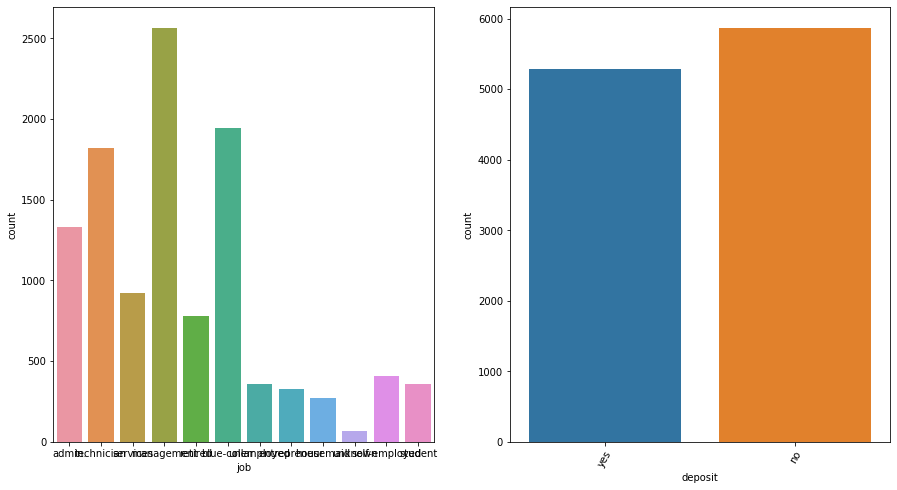

In [13]:
fig,ax = plt.subplots(1,2,figsize=(15,8))
sns.countplot(df['job'],ax=ax[0])
sns.countplot(df['deposit'],ax=ax[1])
plt.xticks(rotation=60)
fig.show()

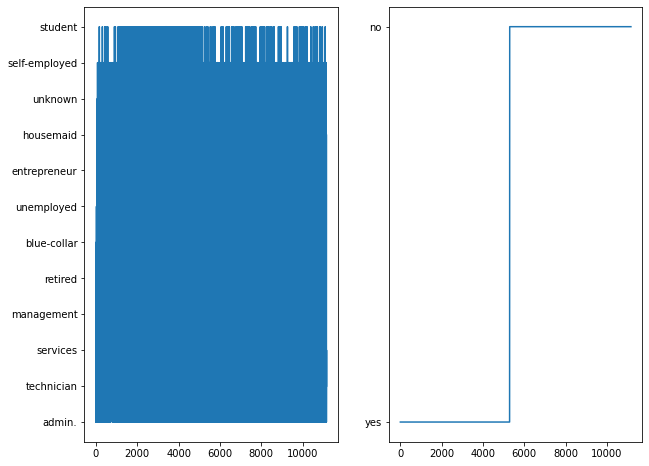

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
data = df
ax1.plot(df['job'])
ax2.plot(df['deposit'])
plt.show()

In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [16]:
df_num = df.select_dtypes(include=[np.number])
df_num

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


In [17]:
df_obj = df.select_dtypes(include="object")
df_obj

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes
...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown,no
11158,services,married,secondary,no,no,no,unknown,jun,unknown,no
11159,technician,single,secondary,no,no,no,cellular,aug,unknown,no
11160,technician,married,secondary,no,no,yes,cellular,may,failure,no


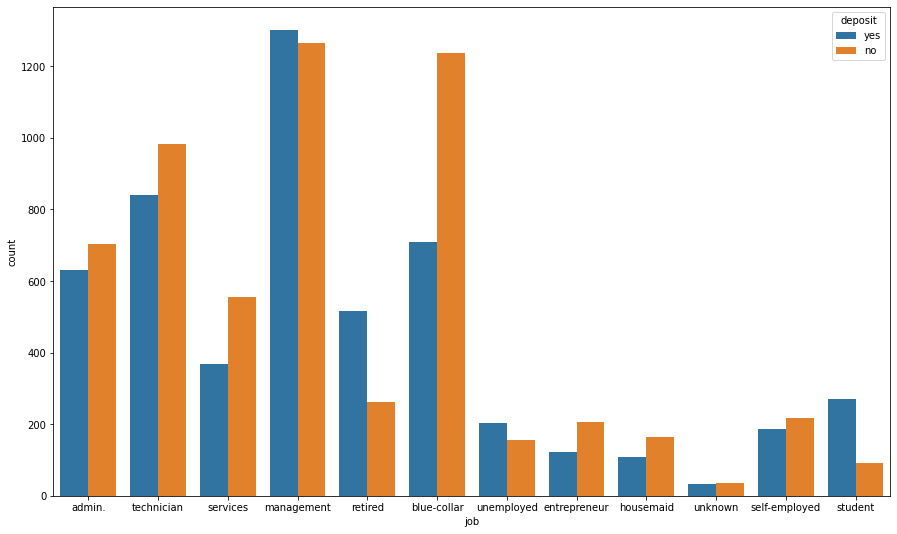

In [18]:
plt.figure(figsize=(15,9))
sns.countplot(df["job"],hue=df["deposit"])
plt.show()

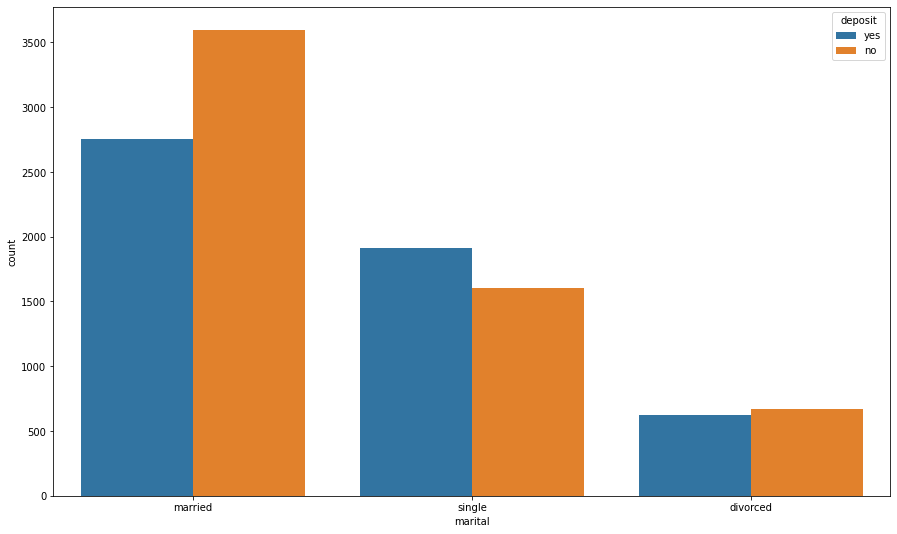

In [19]:
plt.figure(figsize=(15,9))
sns.countplot(df["marital"],hue=df["deposit"])
plt.show()

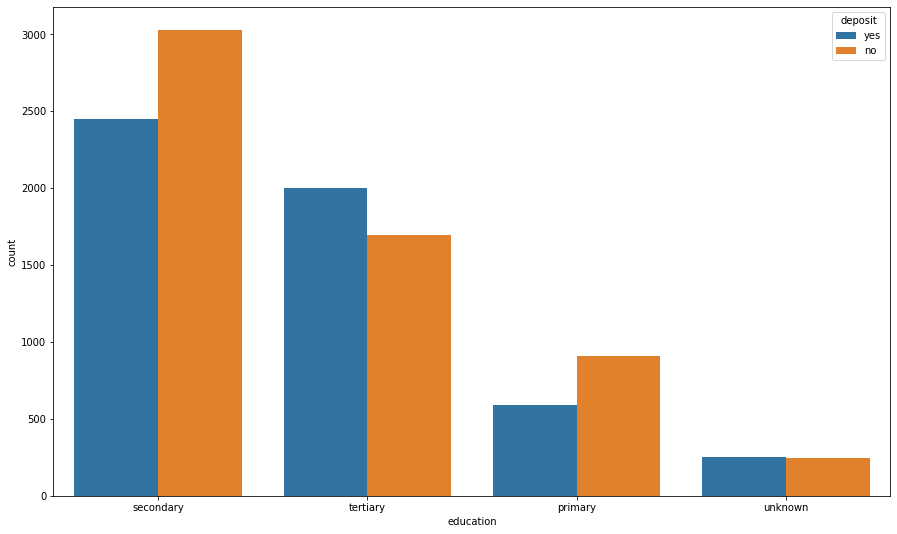

In [20]:
plt.figure(figsize=(15,9))
sns.countplot(df["education"],hue=df["deposit"])
plt.show()

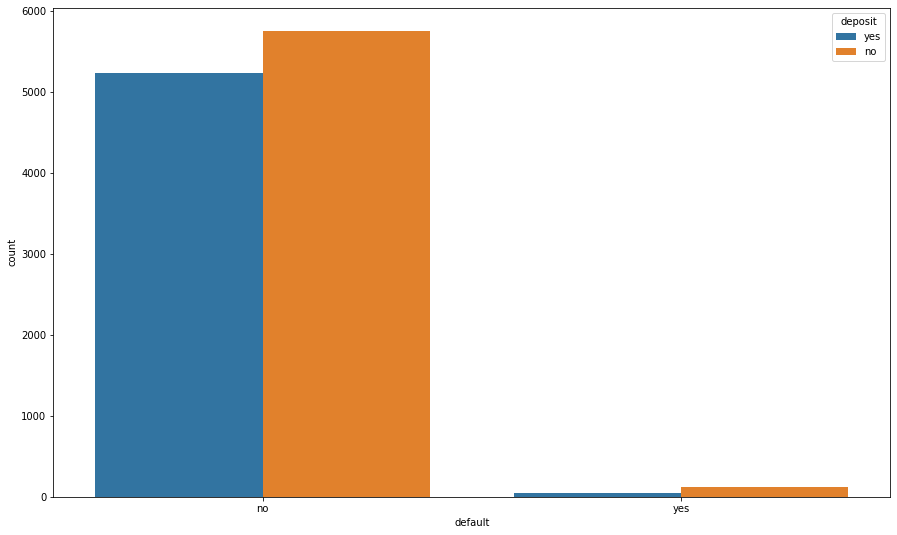

In [21]:
plt.figure(figsize=(15,9))
sns.countplot(df["default"],hue=df["deposit"])
plt.show()

In [22]:
df["default"].value_counts()

no     10994
yes      168
Name: default, dtype: int64

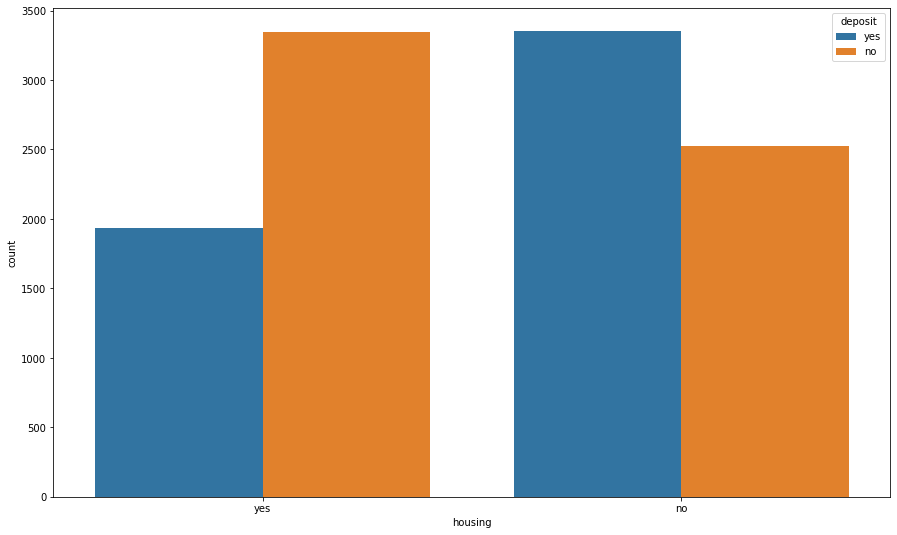

In [23]:
plt.figure(figsize=(15,9))
sns.countplot(df["housing"],hue=df["deposit"])
plt.show()

People having loan aren't subscribing to the deposit and vice versa

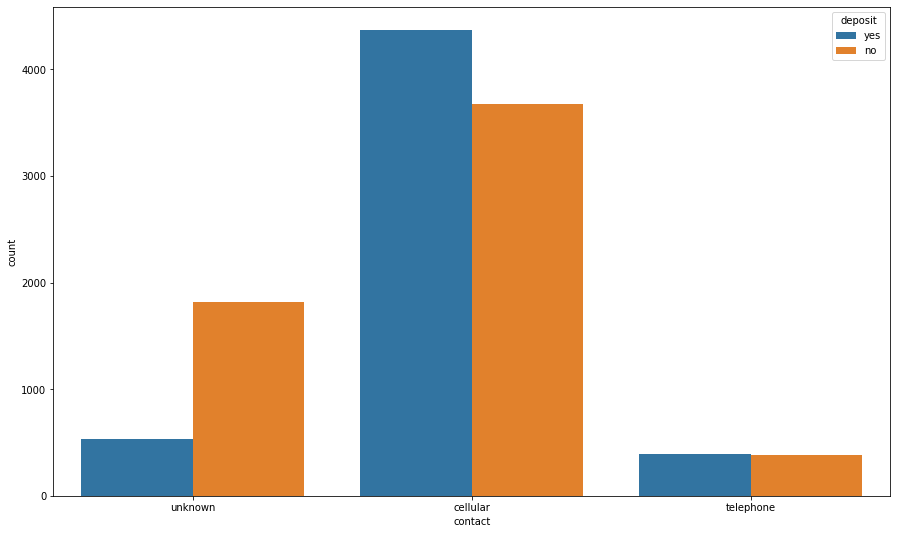

In [24]:
plt.figure(figsize=(15,9))
sns.countplot(df["contact"],hue=df["deposit"])
plt.show()

In [25]:
df["contact"].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

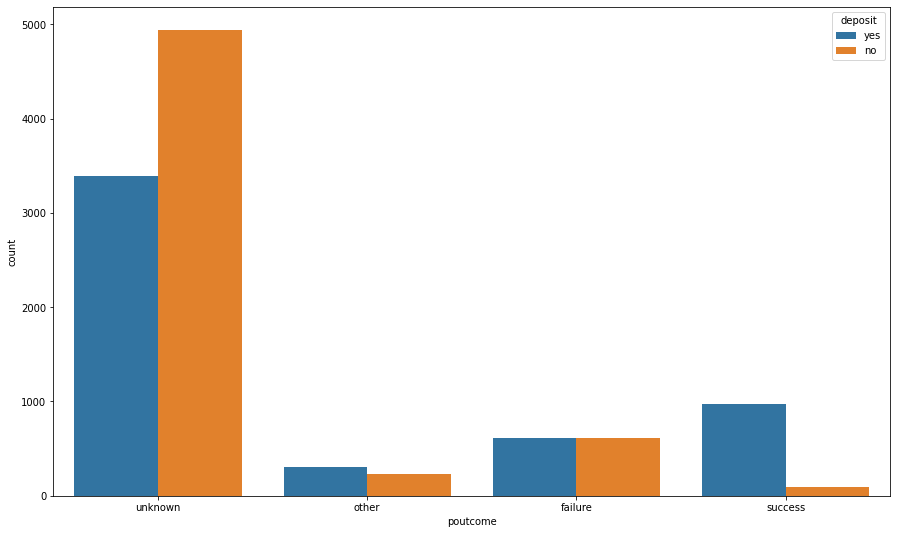

In [26]:
plt.figure(figsize=(15,9))
sns.countplot(df["poutcome"],hue=df["deposit"])
plt.show()

In [27]:
df_num.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [28]:
sns.set_theme()

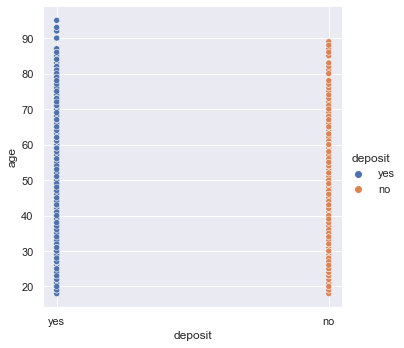

In [29]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="deposit", y="age",
    hue="deposit", sizes=(50, 250),
)

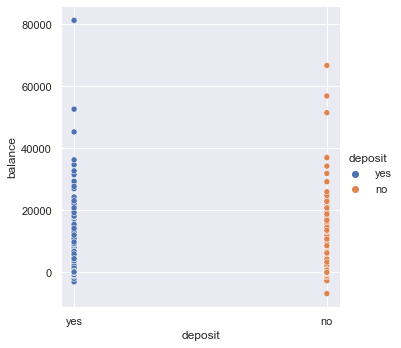

In [30]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="deposit", y="balance",
    hue="deposit", sizes=(50, 250),
)

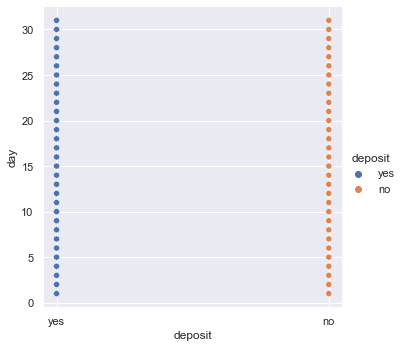

In [31]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="deposit", y="day",
    hue="deposit", sizes=(50, 250),
)

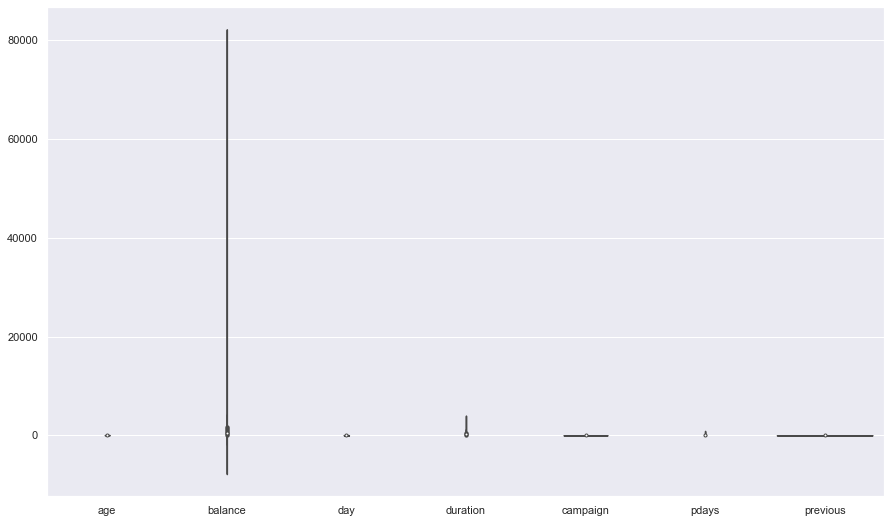

In [32]:
plt.figure(figsize=(15,9))
sns.violinplot(data=df)
plt.show()

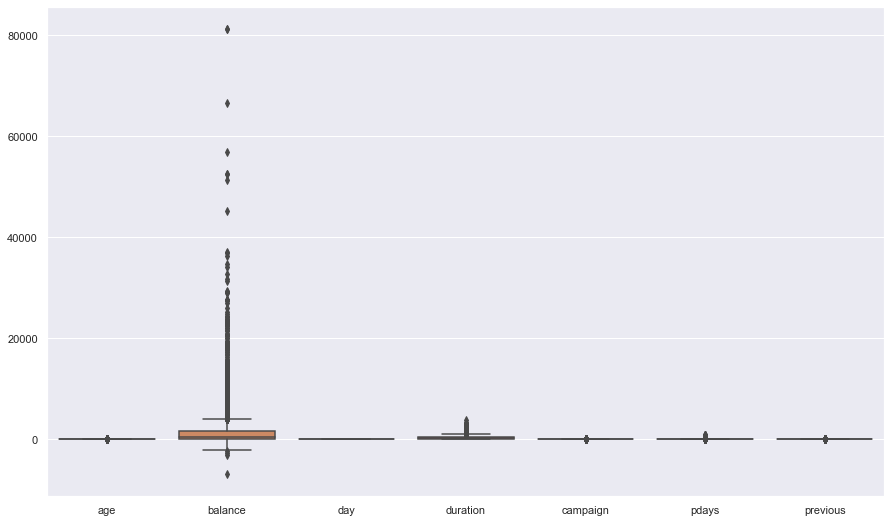

In [33]:
plt.figure(figsize=(15,9))
sns.boxplot(data=df, palette="deep")
plt.show()

<Figure size 800x640 with 0 Axes>

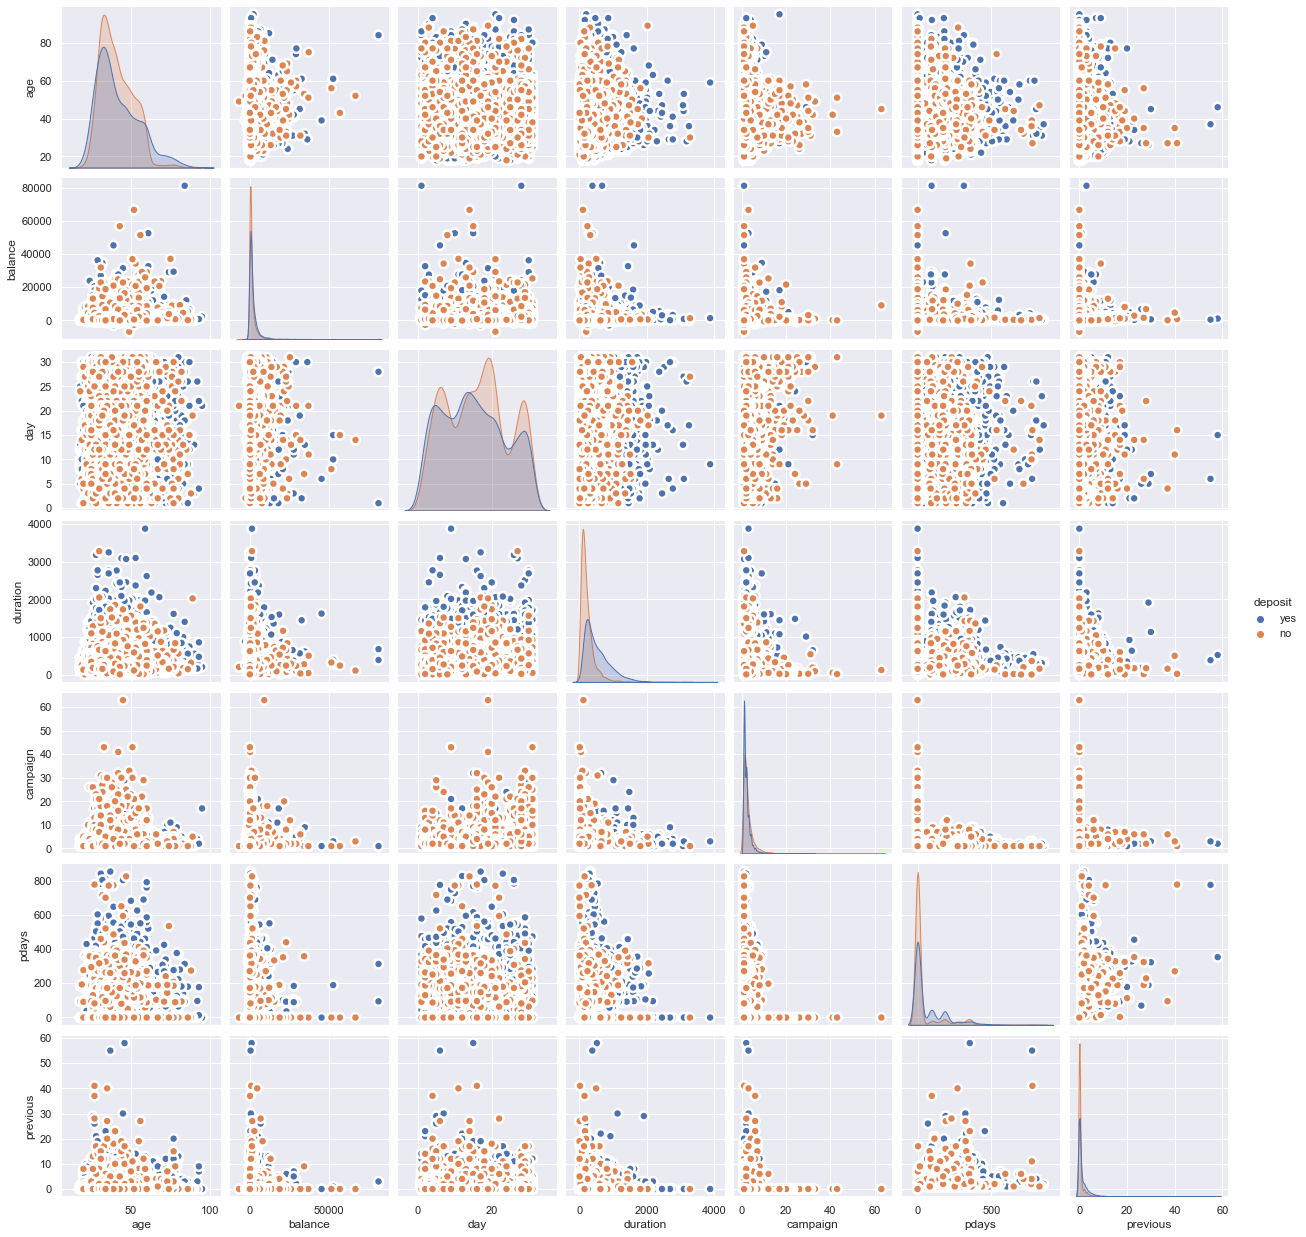

In [34]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="deposit", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

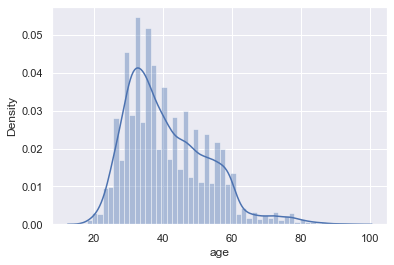

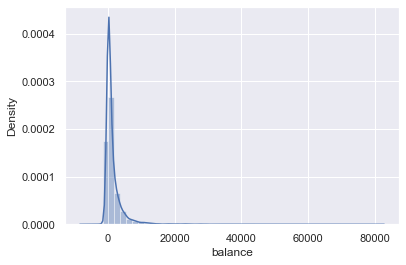

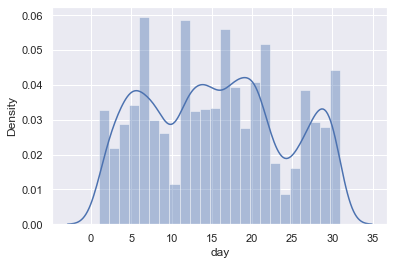

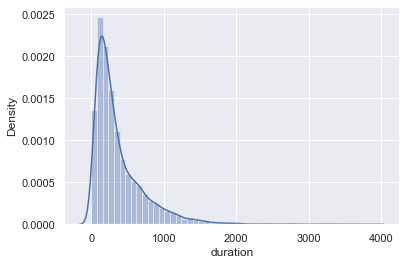

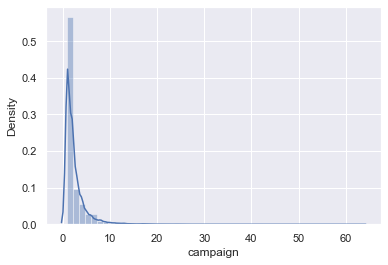

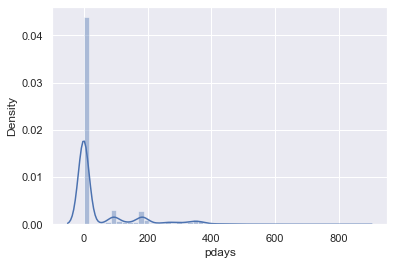

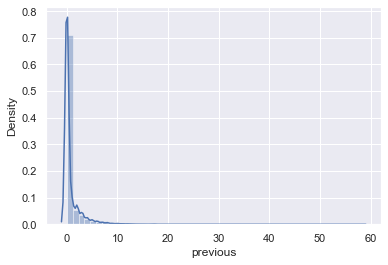

In [35]:
for i in df_num.columns:
    plt.figure()
    sns.distplot(df[i])
    plt.show()

Skewness present in the dataset. We will use yeon johnson method for the same 

<AxesSubplot:>

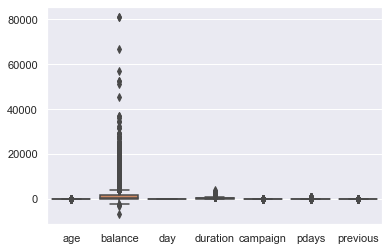

In [36]:
sns.boxplot(data=df)

age           AxesSubplot(0.125,0.816017;0.0824468x0.0639831)
balance     AxesSubplot(0.223936,0.816017;0.0824468x0.0639...
day         AxesSubplot(0.322872,0.816017;0.0824468x0.0639...
duration    AxesSubplot(0.421809,0.816017;0.0824468x0.0639...
campaign    AxesSubplot(0.520745,0.816017;0.0824468x0.0639...
pdays       AxesSubplot(0.619681,0.816017;0.0824468x0.0639...
previous    AxesSubplot(0.718617,0.816017;0.0824468x0.0639...
dtype: object

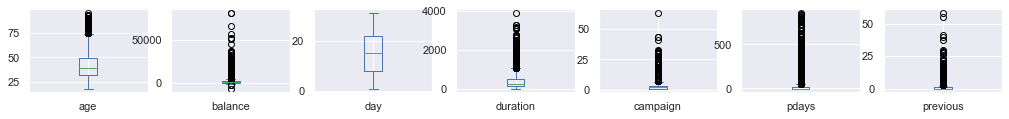

In [37]:
df.plot(kind="box", subplots=True,layout=(10,8),figsize = (20,18))

In [38]:
df_num.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [39]:
df_num.skew().sort_values(ascending=False)

balance     8.224619
previous    7.335298
campaign    5.545578
pdays       2.449986
duration    2.143695
age         0.862780
day         0.111330
dtype: float64

In [40]:
for i in df_num.columns:
    if df_num[i].skew() > 0.55:
        Q1 = df[i].quantile(.25)
        Q3 = df[i].quantile(.75)
        iqr = Q3 - Q1
        high_range = Q3 + (1.5*iqr)  
        low_range = Q1 - (1.5*iqr)
        
        (df[df[i] > high_range]) 
        (df[df[i] < low_range])

        df[i] = np.where(df[i] > high_range , high_range, np.where(df[i] < low_range, low_range,df[i]))    
    else:
        pass;

age           AxesSubplot(0.125,0.816017;0.0824468x0.0639831)
balance     AxesSubplot(0.223936,0.816017;0.0824468x0.0639...
day         AxesSubplot(0.322872,0.816017;0.0824468x0.0639...
duration    AxesSubplot(0.421809,0.816017;0.0824468x0.0639...
campaign    AxesSubplot(0.520745,0.816017;0.0824468x0.0639...
pdays       AxesSubplot(0.619681,0.816017;0.0824468x0.0639...
previous    AxesSubplot(0.718617,0.816017;0.0824468x0.0639...
dtype: object

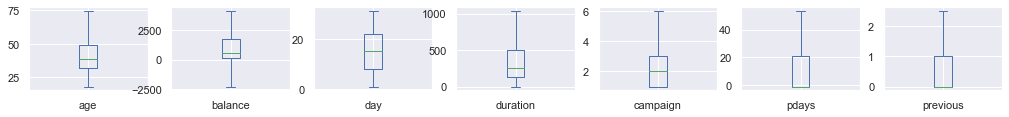

In [41]:
df.plot(kind="box", subplots=True,layout=(10,8),figsize = (20,18))

In [42]:
df_obj

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes
...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown,no
11158,services,married,secondary,no,no,no,unknown,jun,unknown,no
11159,technician,single,secondary,no,no,no,cellular,aug,unknown,no
11160,technician,married,secondary,no,no,yes,cellular,may,failure,no


In [43]:
print("Values in the object columns:")
for i in df_obj.columns:
    print("Total values in",i,"are:\n",df[i].value_counts())
    print("\n")

Values in the object columns:
Total values in job are:
 management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


Total values in marital are:
 married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


Total values in education are:
 secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


Total values in default are:
 no     10994
yes      168
Name: default, dtype: int64


Total values in housing are:
 no     5881
yes    5281
Name: housing, dtype: int64


Total values in loan are:
 no     9702
yes    1460
Name: loan, dtype: int64


Total values in contact are:
 cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64


Total values in month are:
 may    2824
aug  

In [44]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
col1 =df.columns
for i in col1:
    if data[i].dtype == object:
        data[i] = lab.fit_transform(data[i])

In [45]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,0,1,1,0,2343.0,1,0,2,5,8,1033.0,1.0,-1.0,0.0,3,1
1,56.0,0,1,1,0,45.0,0,0,2,5,8,1033.0,1.0,-1.0,0.0,3,1
2,41.0,9,1,1,0,1270.0,1,0,2,5,8,1033.0,1.0,-1.0,0.0,3,1
3,55.0,7,1,1,0,2476.0,1,0,2,5,8,579.0,1.0,-1.0,0.0,3,1
4,54.0,0,1,2,0,184.0,0,0,2,5,8,673.0,2.0,-1.0,0.0,3,1


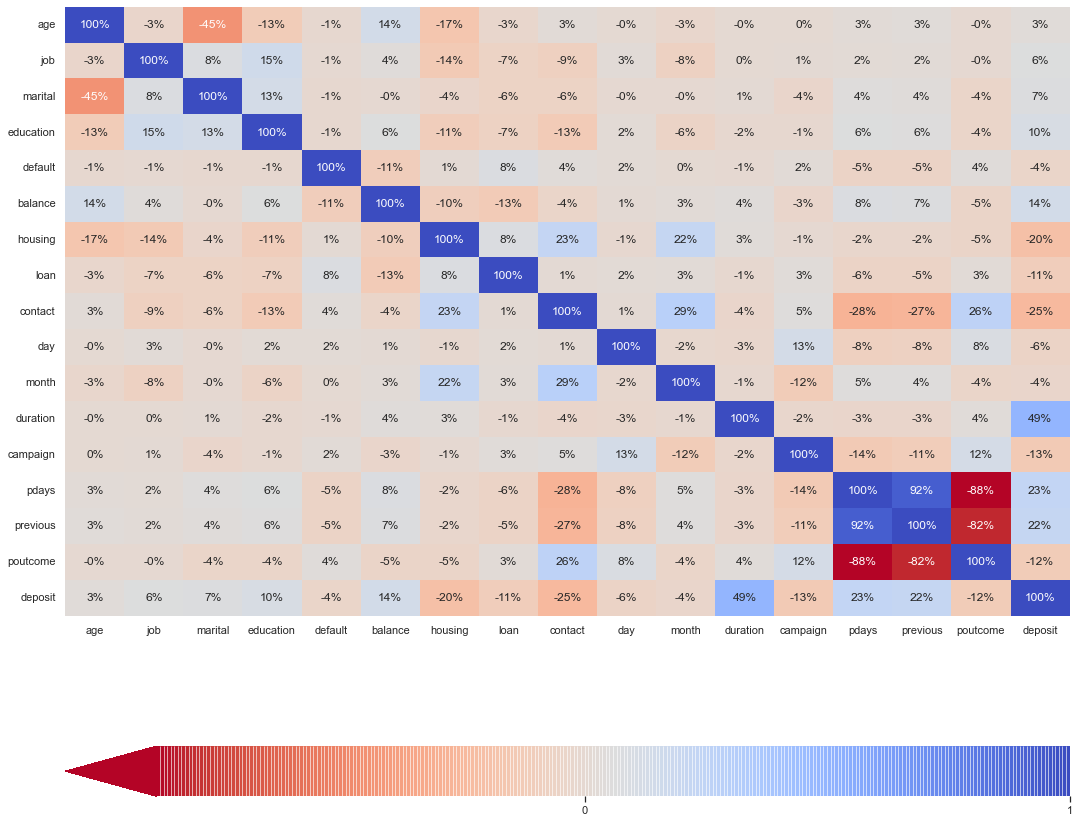

In [46]:
plt.figure(figsize=(18,16))
cbar_kws = {"orientation":"horizontal", 
            "shrink":1,
            'extend':'min', 
            'extendfrac':0.1, 
            "ticks":np.arange(0,22), 
            "drawedges":True,
           }
sns.heatmap(df.corr(),cmap ='coolwarm_r',fmt='.0%',annot =True,cbar_kws=cbar_kws)
plt.show()

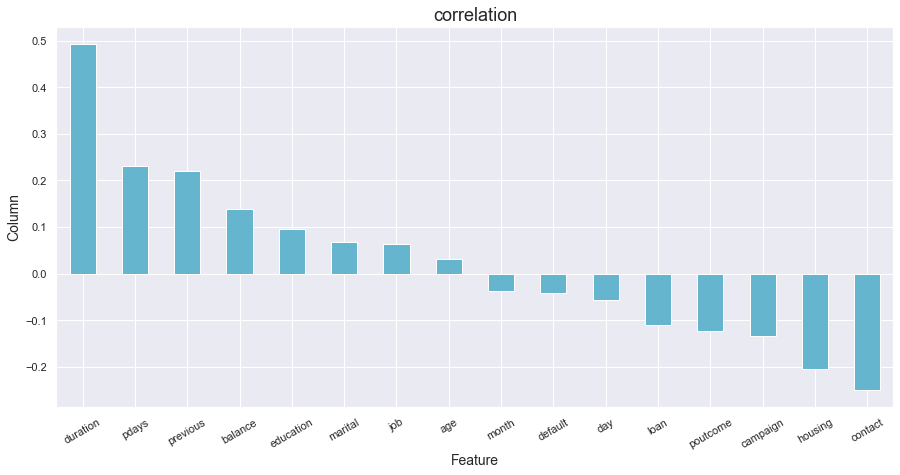

In [47]:
plt.figure(figsize=(15,7))
df.corr()['deposit'].sort_values(ascending=False).drop(['deposit']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.xticks(rotation=30)
plt.ylabel('Column',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

pip install statsmodels

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif = pd.DataFrame()
    vif["Variables"] = x.columns
    vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
    return (vif)

In [49]:
calc_vif(df)

,Variables,VIF Factor
0,age,12.691599
1,job,3.023497
2,marital,4.982482
3,education,4.064125
4,default,1.033604
5,balance,1.808778
6,housing,2.154727
7,loan,1.190981
8,contact,1.777804
9,day,4.448605


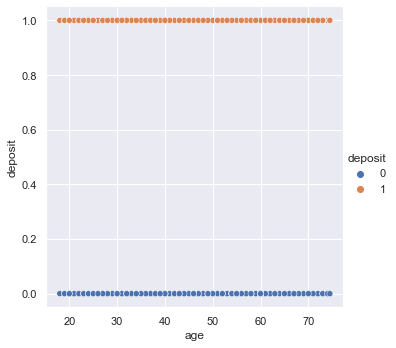

In [50]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="age", y="deposit",
    hue="deposit", #palette=cmap, sizes=(10, 200),
)

In [51]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,0,1,1,0,2343.0,1,0,2,5,8,1033.0,1.0,-1.0,0.0,3,1
1,56.0,0,1,1,0,45.0,0,0,2,5,8,1033.0,1.0,-1.0,0.0,3,1
2,41.0,9,1,1,0,1270.0,1,0,2,5,8,1033.0,1.0,-1.0,0.0,3,1
3,55.0,7,1,1,0,2476.0,1,0,2,5,8,579.0,1.0,-1.0,0.0,3,1
4,54.0,0,1,2,0,184.0,0,0,2,5,8,673.0,2.0,-1.0,0.0,3,1


In [52]:
df.shape

(11162, 17)

In [53]:
x = df.iloc[:,0:16]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59.0,0,1,1,0,2343.0,1,0,2,5,8,1033.0,1.0,-1.000,0.0,3
1,56.0,0,1,1,0,45.0,0,0,2,5,8,1033.0,1.0,-1.000,0.0,3
2,41.0,9,1,1,0,1270.0,1,0,2,5,8,1033.0,1.0,-1.000,0.0,3
3,55.0,7,1,1,0,2476.0,1,0,2,5,8,579.0,1.0,-1.000,0.0,3
4,54.0,0,1,2,0,184.0,0,0,2,5,8,673.0,2.0,-1.000,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,1,2,0,0,1.0,1,0,0,20,0,257.0,1.0,-1.000,0.0,3
11158,39.0,7,1,1,0,733.0,0,0,2,16,6,83.0,4.0,-1.000,0.0,3
11159,32.0,9,2,1,0,29.0,0,0,0,19,1,156.0,2.0,-1.000,0.0,3
11160,43.0,9,1,1,0,0.0,0,1,0,8,8,9.0,2.0,53.375,2.5,0


In [54]:
y = df['deposit']
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int32

In [55]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=45,test_size=.30)

In [59]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(7813, 16)
(7813,)
(3349, 16)
(3349, 16)


In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 

In [61]:
#Logistics Regression
lg = LogisticRegression()
lg.fit(x_train,y_train)
lg_predict = lg.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc,f1_score
print(accuracy_score(y_test,lg_predict),'\n')
print(confusion_matrix(y_test,lg_predict),'\n')
print(classification_report(y_test,lg_predict),'\n')

0.8005374738727978 

[[1430  325]
 [ 343 1251]] 

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1755
           1       0.79      0.78      0.79      1594

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349
 



In [63]:
#Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_predict = dtc.predict(x_test)

In [64]:
print("The scores for the decision tree classifier is:-")
print(accuracy_score(y_test,dtc_predict),'\n')
print(confusion_matrix(y_test,dtc_predict),'\n')
print(classification_report(y_test,dtc_predict),'\n')

The scores for the decision tree classifier is:-
0.7823230815168707 

[[1377  378]
 [ 351 1243]] 

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1755
           1       0.77      0.78      0.77      1594

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349
 



In [65]:
#K Neighbors Classifier
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
knc_predict = knc.predict(x_test)

In [66]:
print("The scores for the K Neighbors Classifier is:-")
print(accuracy_score(y_test,knc_predict),'\n')
print(confusion_matrix(y_test,knc_predict),'\n')
print(classification_report(y_test,knc_predict),'\n')

The scores for the K Neighbors Classifier is:-
0.7787399223648851 

[[1385  370]
 [ 371 1223]] 

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1755
           1       0.77      0.77      0.77      1594

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349
 



In [67]:
#Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_predict = rf.predict(x_test)

In [68]:
print("The scores for the Random Forest Classifier is:-")
print(accuracy_score(y_test,rf_predict),'\n')
print(confusion_matrix(y_test,rf_predict),'\n')
print(classification_report(y_test,rf_predict),'\n')

The scores for the Random Forest Classifier is:-
0.8489101224246044 

[[1434  321]
 [ 185 1409]] 

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1755
           1       0.81      0.88      0.85      1594

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349
 



In [69]:
#Ada Boost Classifier
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
ada_predict = ada.predict(x_test)

In [71]:
print("The scores for the Ada Boost Classifier is:-")
print(accuracy_score(y_test,ada_predict),'\n')
print(confusion_matrix(y_test,ada_predict),'\n')
print(classification_report(y_test,ada_predict),'\n')

The scores for the Ada Boost Classifier is:-
0.8274111675126904 

[[1476  279]
 [ 299 1295]] 

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1755
           1       0.82      0.81      0.82      1594

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349
 



In [73]:
from sklearn.model_selection import cross_val_score
score_rf = cross_val_score(rf,x,y,cv=5)
print('\n')

print(score_rf)
print(score_rf.mean())
print(score_rf.std())



[0.77205553 0.76444245 0.81630824 0.85842294 0.83781362]
0.8098085575282461
0.0365328945423763


(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
criterion = ['gini','entropy']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [5,10,15,20,100]
min_samples_leaf = [2,5,10,15]
ccp_alpha = [0.5,1.5,2.5,3.5,4.5,5.5]
max_leaf_nodes = [1,2,3,4,5]
max_features = [2,4,6,8,10]
max_features = ['auto','sqrt','log2']
oob_score = [False,True]
verbose = 1

random_grid = {
    'criterion':criterion,
    'max_features':max_features,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'oob_score':oob_score
}

In [83]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=20,cv=5,verbose=2,n_jobs=2)

In [84]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=2,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 5, 10, 15],
                                        'min_samples_split': [5, 10, 15, 20,
                                                              100],
                                        'oob_score': [False, True]},
                   scoring='neg_mean_squared_error', verbose=2)

In [85]:
rf_random.best_params_

{'oob_score': True,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 30,
 'criterion': 'entropy'}

In [88]:
rf_random.best_score_

-0.1598588682095481

In [89]:
rf_random.best_index_

17

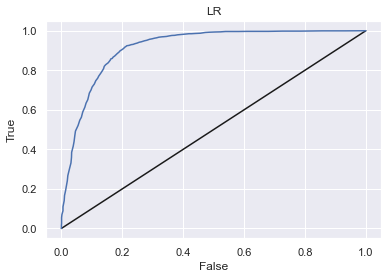

In [90]:
deposit_predict_prob = rf.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,deposit_predict_prob)

plt.plot([0,1],[0,1],'k')
plt.plot(fpr,tpr,label='LR')
plt.xlabel('False')
plt.ylabel('True')
plt.title('LR')
plt.show()

In [91]:
import pickle
filename = 'bank.pkl'
pickle.dump(rf, open(filename, 'wb'))